### 4. Model Evaluation
#### Task 4: Model Evaluation

**Load Data and Model**

In [ ]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

# Load processed data and trained model
data = joblib.load("../data/processed_data.pkl")
model = joblib.load("../models/best_model.pkl")

# Training features
training_features = ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'RAD_4.0', 'CHAS']

# assinging X_test and y_test from processed data for model evaluation
X_test_all = data['X_test']

# Match training features
X_test = X_test_all[training_features]
y_test = data['y_test']

print("X_test data: \n", X_test)
print("y_test data: \n", y_test)

X_test data: 
            RM     LSTAT   PTRATIO     INDUS       TAX  RAD_4.0 CHAS
173  0.223449 -0.521791 -0.870216 -0.199893 -0.666608    False  0.0
274  0.766634 -1.328639 -0.403321 -0.689588 -0.916058     True  0.0
491 -0.464268  0.800501  0.763919  2.494921  1.798194     True  0.0
72  -0.334031 -1.037236  0.343713 -0.032680 -0.613155     True  0.0
452  0.034446  0.683354  0.810609  1.055696  1.530926    False  0.0
..        ...       ...       ...       ...       ...      ...  ...
412 -2.377329  2.632381  0.810609  1.055696  1.530926    False  0.0
436  0.294921  0.797572  0.810609  1.055696  1.530926    False  0.0
411  0.606220  1.261765  0.810609  1.055696  1.530926    False  0.0
86  -0.413444  0.037584  0.016886 -0.976238 -0.957633    False  0.0
75   0.016975 -0.536435  0.110265  0.268900 -0.060801    False  0.0

[102 rows x 7 columns]
y_test data: 
 173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.

**Calculate Metrics**

In [ ]:
# Generate predictions
y_pred = model.predict(X_test)

# Calculate metrics
metrics = {
    "RMSE": root_mean_squared_error(y_test, y_pred),
    "MSE": mean_squared_error(y_test, y_pred),
    "R²": r2_score(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred)  # Added for robustness
}

pd.DataFrame([metrics])

f:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,RMSE,MSE,R²,MAE
0,3.032855,9.198207,0.811994,2.217479


**Predicitons**

In [4]:
predictions = pd.DataFrame({
                        'Real': y_test,
                        'predicted': y_pred
                    }).sort_index()
predictions.head()

,Real,predicted
0,24.0,27.013309
2,34.7,34.947609
9,18.9,19.348469
11,18.9,20.947292
18,20.2,18.723349


**Residual Analysis**

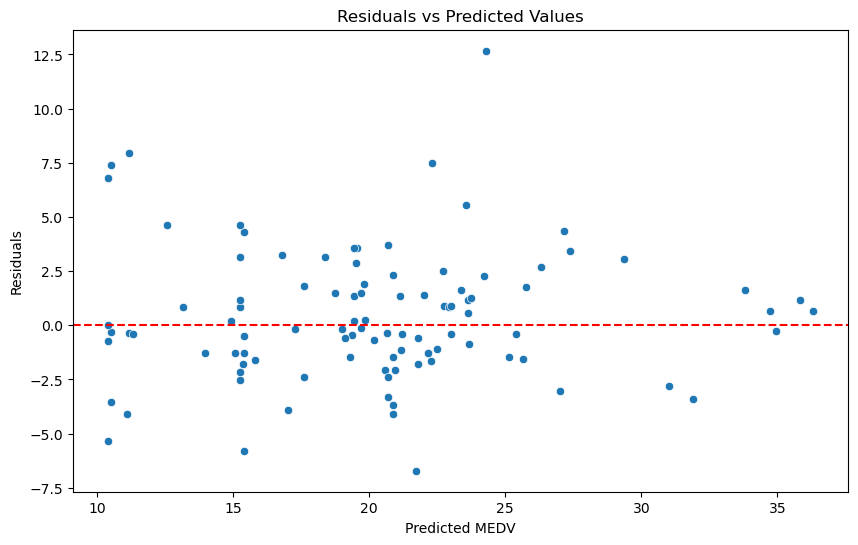

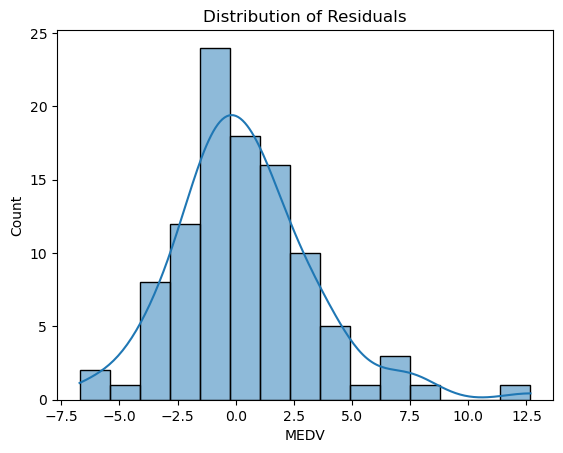

In [6]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.show()

# Distribution of residuals
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

**Feature Importance (XGBoost)**

Comparing model performance with different features selected from EDA

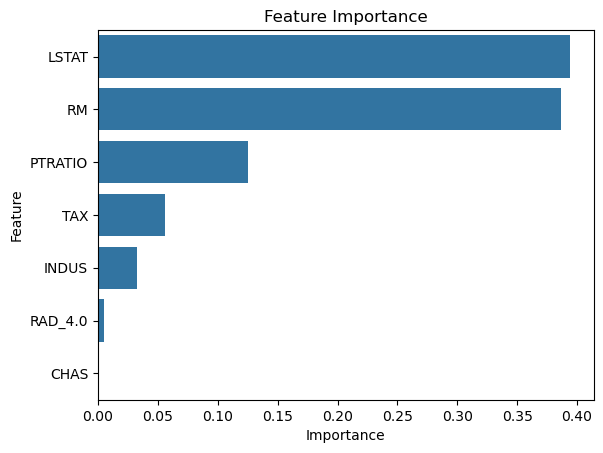

In [7]:
# For tree-based models
if hasattr(model, 'feature_importances_'):
    importance = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    sns.barplot(x='Importance', y='Feature', data=importance)
    plt.title("Feature Importance")
    plt.show()

**Saving the metrics, feature importance and predictions**

In [9]:
# Save the metrics
joblib.dump(metrics, "../models/metrics.pkl")
print("\nSaved metrics to ../models/metrics.pkl")

# Save the feature importance
importance.to_csv("../data/feature_importance.csv")
print("\nSaved feature importance to ../data/feature_importance.csv")

# Save the predictions
predictions.to_csv("../data/predictions.csv")
print("\nSaved predictions to ../data/predictions.csv")


Saved metrics to ../models/metrics.pkl

Saved feature importance to ../data/feature_importance.csv

Saved predictions to ../data/predictions.csv
